## Вопрос по выбору: 
   ### "Закон Эйнштейна-Смолоуховскго и другие случаи расплывания облака частиц"
    

##### Цель: 
###### Численно смоделировать расплывание облака частиц и ислледовать различные параметры от которых зависят (или могут зависеть) законы расплывания

##### Закон:
     <r^2> = r0^2 + 6kTBt
     Мы же будем исследовать распространение 
     частиц из одной точки (r0 = 0) и при постоянном 
     давлении и вязкости среды. А время будем 
     измерять числом шагов (steps). Длину свободного 
     пробега обозначим за L.
     Итого: <r^2> ~ steps * L^2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.patches import Circle

def random_path(N, L, distr='normal', alpha=3.0, M=1.0, t=0):
    v = np.random.normal(size=(2, N)) # случайные направлния
    nv = v / np.sqrt(np.sum(v**2, 0)) # нормировка
    nv /= np.sqrt(M)                  # скорости частиц примеси
    
    if distr == 'pareto':
        # тяжелый хвост
        steps = L * (np.random.pareto(alpha, N))
    else:
        # нормальное распределение
        steps = np.random.normal(scale=L*np.sqrt(M), size=N)
    if t == 0:
        R = np.cumsum(nv * steps, axis=1)
        sum = np.sum(nv * steps, axis=1)
        R_exp = np.sqrt(sum[0]**2 + sum[1]**2)
    else:
        R = np.cumsum(nv / np.random.randint(1, t) * steps, axis=1)
        sum = np.sum(nv / np.random.randint(1, t) * steps, axis=1)
        R_exp = np.sqrt(sum[0]**2 + sum[1]**2)
    return R, R_exp

def modulate(L=1.0, steps=int(1e4), NUM_PATHS=30, distr='normal',
             alpha=3.0, mass=1.0, sub=0):
    R = []
    R_exp = 0.
    R0 = np.sqrt(steps) * L # теоретическое среднеквадратичное смещение
    for i in range(NUM_PATHS):
        path, r = random_path(steps, L, distr, alpha, mass, sub)
        R_exp += r
        R.append(path)
    plt.rcParams['figure.figsize'] = [10, 10]
    ax = plt.gca()
    plt.axis('equal')
    ax.add_patch(Circle((0,0), R0, color='black', fill=False))
    print("Theoretical radius: ", R0, "\tExperimental radius: ", R_exp / NUM_PATHS)
    for graph in R:
        ax.plot(graph[0], graph[1], '-')
    plt.show()

### 1. Влияние длины свободного пробега (~ температуры):

##### L = 1.0

Theoretical radius:  100.0 	Experimental radius:  92.30516906878111


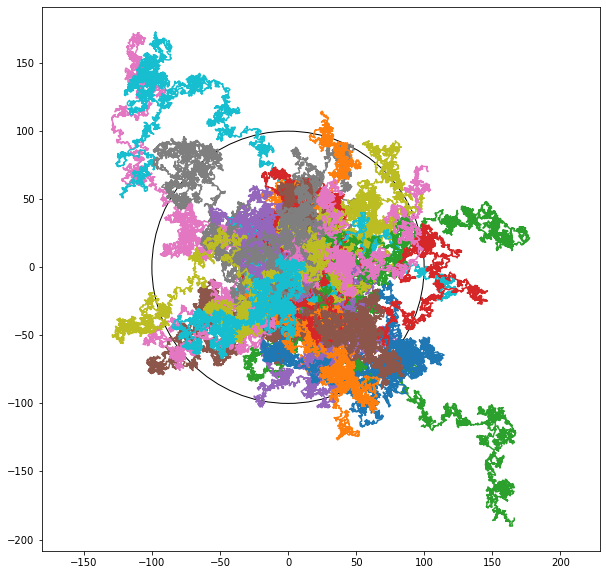

In [40]:
L = 1.0
modulate(L)

##### L = 100000.0

Theoretical radius:  10000000.0 	Experimental radius:  9604149.219142139


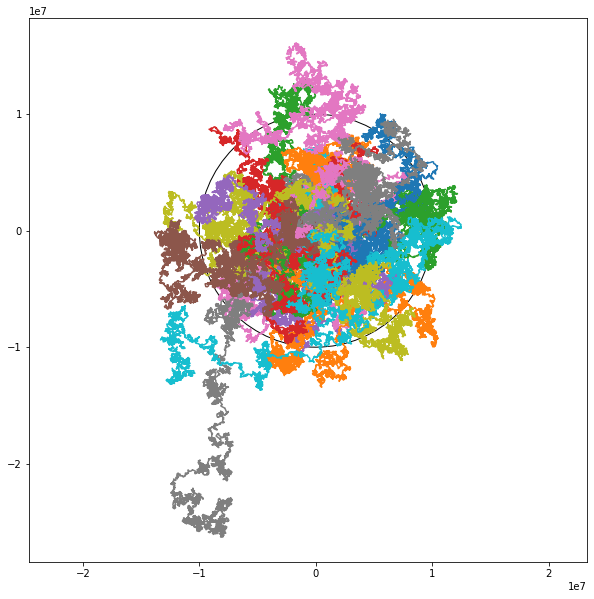

In [35]:
L = 100000.0
modulate(L)

##### L = 0.000001

Theoretical radius:  9.999999999999999e-05 	Experimental radius:  9.316088148706125e-05


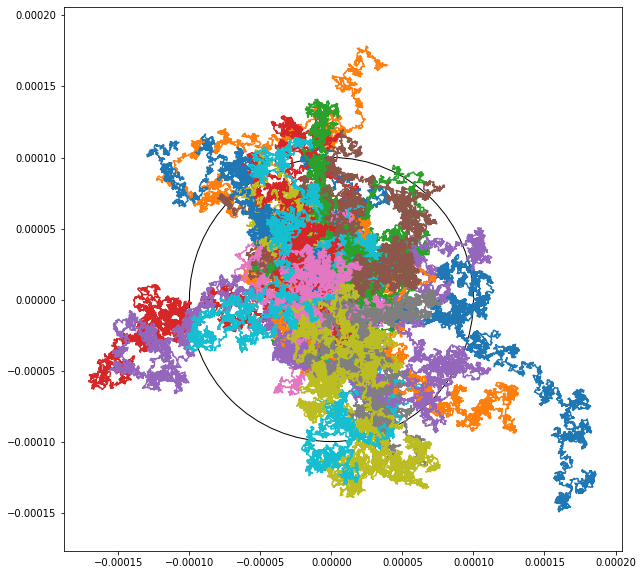

In [39]:
L = 0.000001
modulate(L)

##### Итог: даже при очень малых и очень больших длинах свободного пробега частицы не выходили дальше 2-3 радиусов теоретического круга, то есть закон выполняется

### 2. Влияние числа шагов (~ времени):

##### N = 10

Theoretical radius:  3.1622776601683795 	Experimental radius:  2.700606106045355


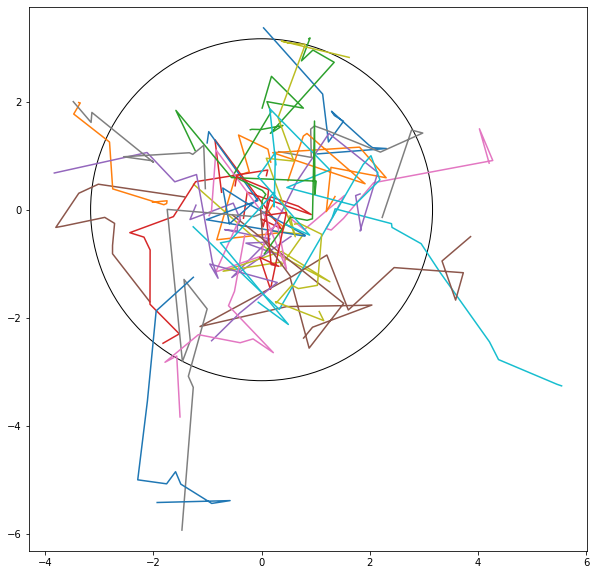

In [46]:
N = int(10)
modulate(steps=N)

##### N = 10^2

Theoretical radius:  10.0 	Experimental radius:  9.074884230018096


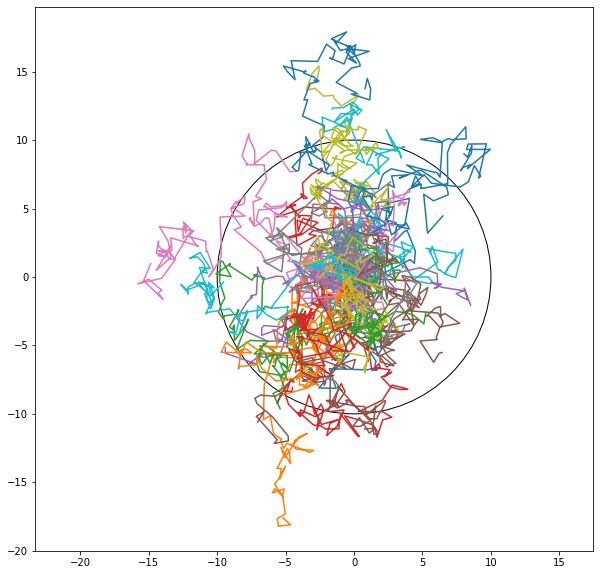

In [18]:
N = int(1e2)
modulate(steps=N)

##### N = 10^6

Theoretical radius:  1000.0 	Experimental radius:  966.8943220318558


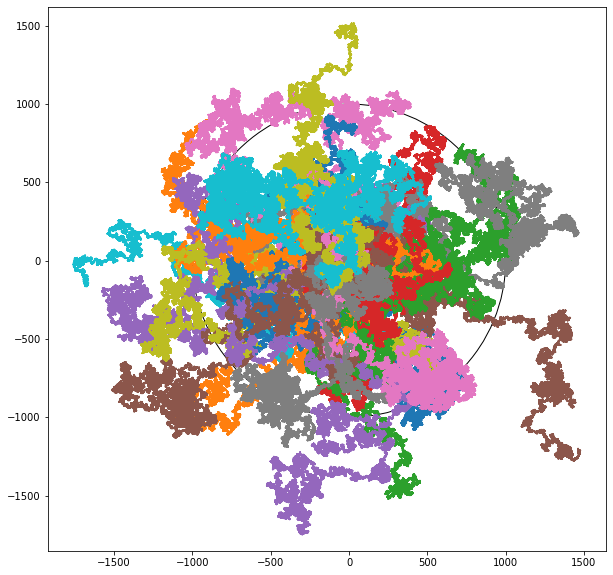

In [3]:
N = int(1e6)
modulate(steps=N)

##### Итог: как при довольно малых, так и при довольно больших временах закон выполняется с очень хорошей точностью 


## Диффузия

### 3. Супердиффузия:

    Для моделирования используем распределение Парето
    P(X > x) = {(x_m/x)^alpha, если x >= x_m | 1, если x < x_m}
    Где x_m - коэффициент сдвига, а alpha - степень хвоста 
    
    Распределения с «тяжёлыми хвостами», имеют широкую область приложения в физике. 
    Например, в распределении Коши, встречающегося при описании разного рода резонансных явлений, в частности: 
    при описании резонансной кривой гармонического осциллятора или формы контура спектральной
    линии (распределение Лоренца), а также в теории резонансных ядерных реакций (формула Брейта–Вигнера).

##### alpha = 2.5

Theoretical radius:  100.0 	Experimental radius:  144.3539140369867


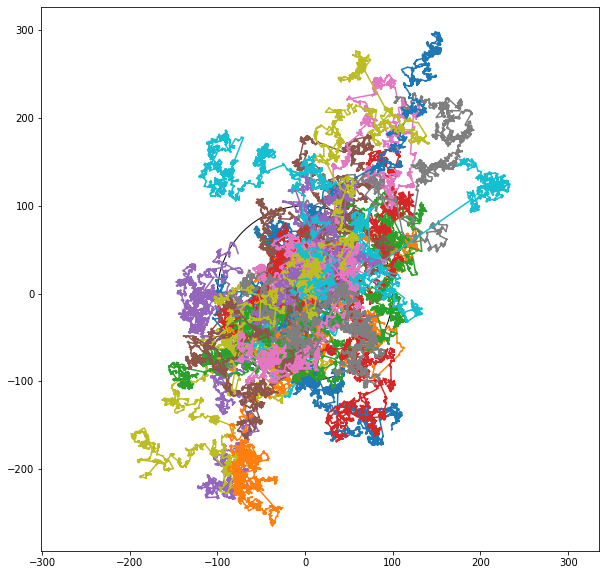

In [20]:
alpha = 2.5
modulate(distr='pareto', alpha=alpha)

##### alpha = 2.0

Theoretical radius:  100.0 	Experimental radius:  264.95143712533365


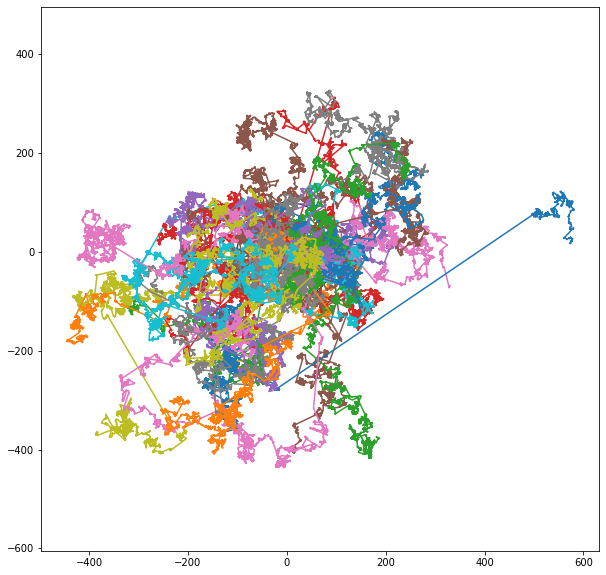

In [21]:
alpha = 2.0
modulate(distr='pareto', alpha=alpha)

##### alpha = 1.5

Theoretical radius:  100.0 	Experimental radius:  1385.1642133527596


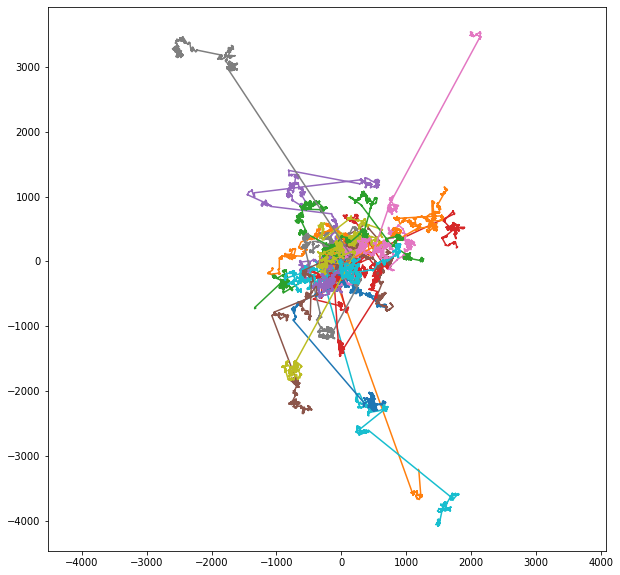

In [22]:
alpha = 1.5
modulate(distr='pareto', alpha=alpha)

### 4. Субдиффузия:

    В качестве физического примера можно рассмотреть диффузию
    в пористой среде вблизи так называемого порога просачивания (или перколяции), 
    когда имеется один основной канал, соединяющий начальную и конечную точки («хребет») 
    с множеством длинных «тупиковых» ответвлений (так называемая «гребешковая структура»). 
    Пусть как на хребте, так и в ответвлениях имеет место классическая одномерная диффузия
    с одним и тем же коэффициентом. Ответвления играют роль ловушек,
    в которых частица «застревает» до тех пор, пока благодаря случайным
    блужданиям не вернется в точку соединения с хребтом, где она может
    продолжить движение по основному пути

Theoretical radius:  100.0 	Experimental radius:  5.01447366856776


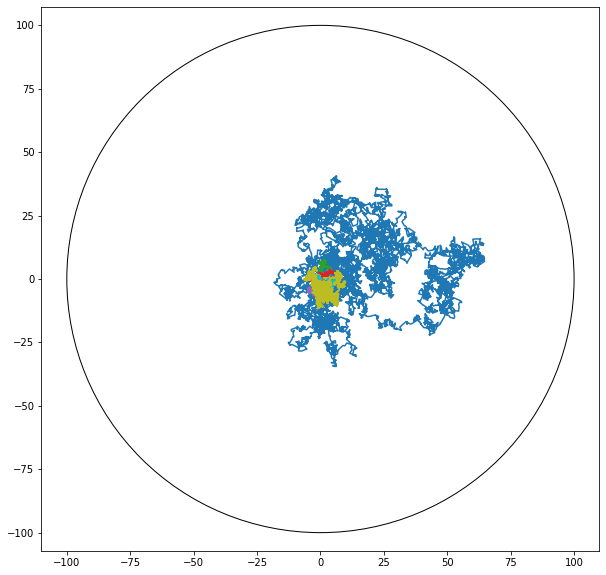

In [23]:
modulate(sub=100)

### 5. Диффузия тяжелой примеси
    <V> = <v> * sqrt(m/M)
    L' ~ L * sqrt(M/m)
    <r^2> ~ L' * <V> * t
    Более подробно см. https://github.com/und3f1n3d5/VpV.summer1year/blob/try1/%D0%94%D0%B8%D1%84%D1%84%D1%83%D0%B7%D0%B8%D1%8F%20%D1%82%D1%8F%D0%B6%D0%B5%D0%BB%D0%BE%D0%B9%20%D0%BF%D1%80%D0%B8%D0%BC%D0%B5%D1%81%D0%B8.pdf

##### M/m = 2.0

Theoretical radius:  100.0 	Experimental radius:  93.09141181350023


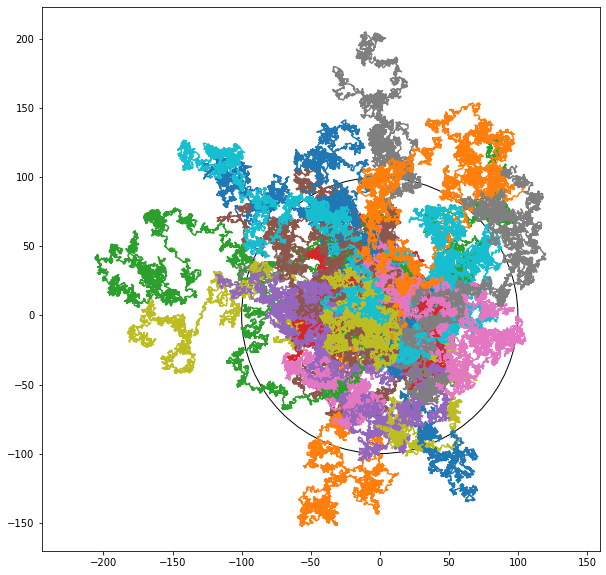

In [4]:
modulate(mass=2.0)

##### M/m = 10.0

Theoretical radius:  100.0 	Experimental radius:  101.3674542080851


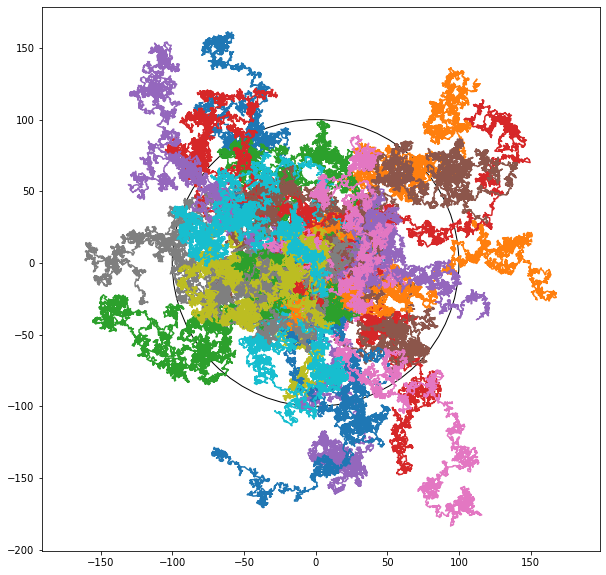

In [31]:
modulate(mass=10.0)

##### M/m = 100.0

Theoretical radius:  100.0 	Experimental radius:  97.50719571510467


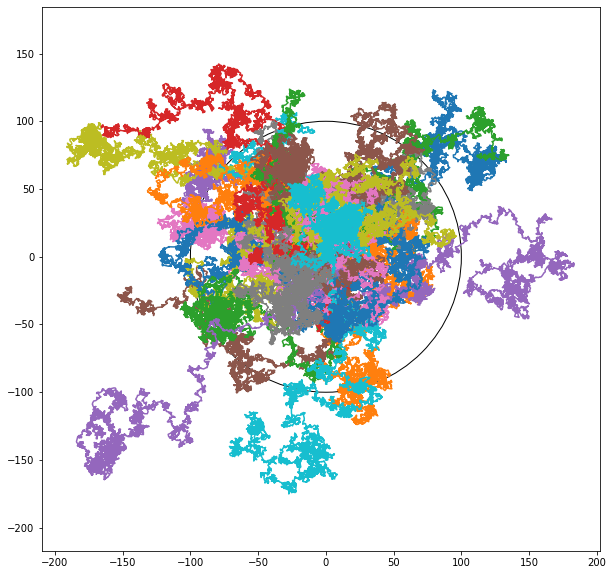

In [32]:
modulate(mass=100.0)

##### Итог: Коэффициент диффузии не зависит от массы частиц примеси